**TASK 2 - Evolutionary and Fuzzy Systems**

*PART 1* - Design and Implementation of the FLC


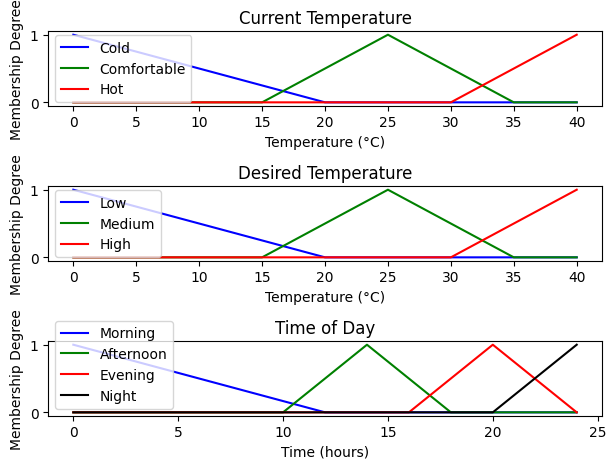

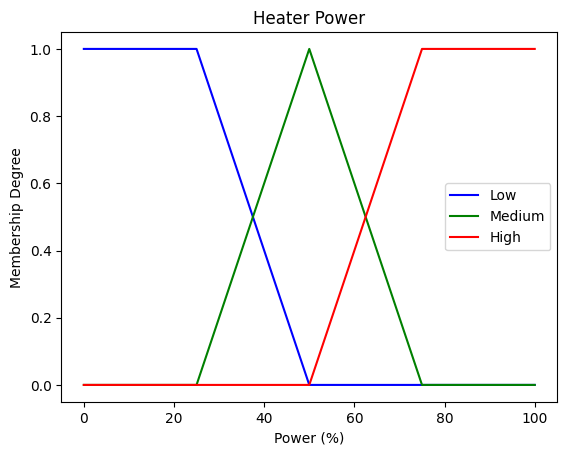

Heater Power: 0


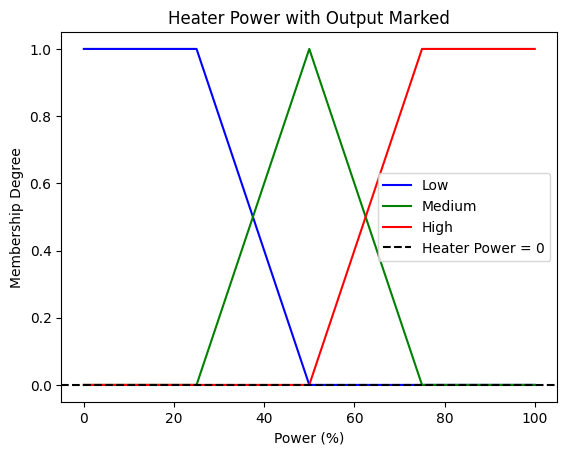

In [13]:
import numpy as np
import matplotlib.pyplot as plt

xRangeTemp = np.arange(0, 40.1, 0.1)
xRangePower = np.arange(0, 100.1, 0.1)
xRangeTime = np.arange(0, 24.1, 0.1)

currentTempCold = lambda x: np.maximum(0, np.minimum(1, (20 - x) / 20))
currentTempComfortable = lambda x: np.maximum(0, np.minimum((x - 15) / 10, (35 - x) / 10))
currentTempHot = lambda x: np.maximum(0, np.minimum(1, (x - 30) / 10))
desiredTempLow = lambda x: np.maximum(0, np.minimum((20 - x) / 20, 1))
desiredTempMedium = lambda x: np.maximum(0, np.minimum((x - 15) / 10, (35 - x) / 10))
desiredTempHigh = lambda x: np.maximum(0, np.minimum(1, (x - 30) / 10))
timeOfDayMorning = lambda x: np.maximum(0, np.minimum(1, (12 - x) / 12))
timeOfDayAfternoon = lambda x: np.maximum(0, np.minimum((x - 10) / 4, (18 - x) / 4))
timeOfDayEvening = lambda x: np.maximum(0, np.minimum((x - 16) / 4, (24 - x) / 4))
timeOfDayNight = lambda x: np.maximum(0, np.minimum(1, (x - 20) / 4))
heaterPowerLow = lambda x: np.maximum(0, np.minimum((50 - x) / 25, 1))
heaterPowerMedium = lambda x: np.maximum(0, np.minimum((x - 25) / 25, (75 - x) / 25))
heaterPowerHigh = lambda x: np.maximum(0, np.minimum((x - 50) / 25, 1))


rules = [
    (lambda ct, dt, td: min(currentTempCold(ct), desiredTempHigh(dt)), heaterPowerHigh),
    (lambda ct, dt, td: min(currentTempComfortable(ct), desiredTempMedium(dt)), heaterPowerLow),
    (lambda ct, dt, td: min(currentTempHot(ct), desiredTempLow(dt)), heaterPowerLow),
    (lambda ct, dt, td: min(currentTempCold(ct), desiredTempLow(dt)), heaterPowerMedium),
    (lambda ct, dt, td: min(currentTempHot(ct), desiredTempHigh(dt)), heaterPowerMedium),
]


plt.figure()
plt.subplot(3, 1, 1)
plt.plot(xRangeTemp, currentTempCold(xRangeTemp), 'b', label='Cold')
plt.plot(xRangeTemp, currentTempComfortable(xRangeTemp), 'g', label='Comfortable')
plt.plot(xRangeTemp, currentTempHot(xRangeTemp), 'r', label='Hot')
plt.title('Current Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(xRangeTemp, desiredTempLow(xRangeTemp), 'b', label='Low')
plt.plot(xRangeTemp, desiredTempMedium(xRangeTemp), 'g', label='Medium')
plt.plot(xRangeTemp, desiredTempHigh(xRangeTemp), 'r', label='High')
plt.title('Desired Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Membership Degree')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(xRangeTime, timeOfDayMorning(xRangeTime), 'b', label='Morning')
plt.plot(xRangeTime, timeOfDayAfternoon(xRangeTime), 'g', label='Afternoon')
plt.plot(xRangeTime, timeOfDayEvening(xRangeTime), 'r', label='Evening')
plt.plot(xRangeTime, timeOfDayNight(xRangeTime), 'k', label='Night')
plt.title('Time of Day')
plt.xlabel('Time (hours)')
plt.ylabel('Membership Degree')
plt.legend()
plt.tight_layout()
plt.show()


plt.figure()
plt.plot(xRangePower, heaterPowerLow(xRangePower), 'b', label='Low')
plt.plot(xRangePower, heaterPowerMedium(xRangePower), 'g', label='Medium')
plt.plot(xRangePower, heaterPowerHigh(xRangePower), 'r', label='High')
plt.title('Heater Power')
plt.xlabel('Power (%)')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()


input_values = [15, 30, 10]
aggregatedOutput = 0
aggregatedWeight = 0
for rule in rules:
    weight = rule[0](input_values[0], input_values[1], input_values[2])
    output = rule[1](weight)
    aggregatedOutput += weight * output
    aggregatedWeight += weight

if aggregatedWeight > 0:
    heaterPower = aggregatedOutput / aggregatedWeight
else:
    heaterPower = 0

print(f'Heater Power: {heaterPower}')


plt.figure()
plt.plot(xRangePower, heaterPowerLow(xRangePower), 'b', label='Low')
plt.plot(xRangePower, heaterPowerMedium(xRangePower), 'g', label='Medium')
plt.plot(xRangePower, heaterPowerHigh(xRangePower), 'r', label='High')
plt.axhline(y=heaterPower, color='k', linestyle='--', label=f'Heater Power = {heaterPower}')
plt.title('Heater Power with Output Marked')
plt.xlabel('Power (%)')
plt.ylabel('Membership Degree')
plt.legend()
plt.show()



*PART 2* - Compare 3 different optimization techniques on CEC’2005 functions.     

**Optimize with PSO**

In [4]:
pip install pyswarms


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 3.9 MB/s eta 0:00:00


Iteration 1/200, Best Cost: 51.63376452477637
Iteration 2/200, Best Cost: 35.552278047948086
Iteration 3/200, Best Cost: 10.695579425965919
Iteration 4/200, Best Cost: 5.326840248217523
Iteration 5/200, Best Cost: 5.326840248217523
Iteration 6/200, Best Cost: 5.326840248217523
Iteration 7/200, Best Cost: 5.326840248217523
Iteration 8/200, Best Cost: 5.326840248217523
Iteration 9/200, Best Cost: 5.326840248217523
Iteration 10/200, Best Cost: 5.326840248217523
Iteration 11/200, Best Cost: 5.326840248217523
Iteration 12/200, Best Cost: 5.326840248217523
Iteration 13/200, Best Cost: 5.326840248217523
Iteration 14/200, Best Cost: 5.326840248217523
Iteration 15/200, Best Cost: 5.326840248217523
Iteration 16/200, Best Cost: 5.326840248217523
Iteration 17/200, Best Cost: 5.326840248217523
Iteration 18/200, Best Cost: 5.326840248217523
Iteration 19/200, Best Cost: 5.326840248217523
Iteration 20/200, Best Cost: 4.501604142476219
Iteration 21/200, Best Cost: 3.3432341974421673
Iteration 22/200, B

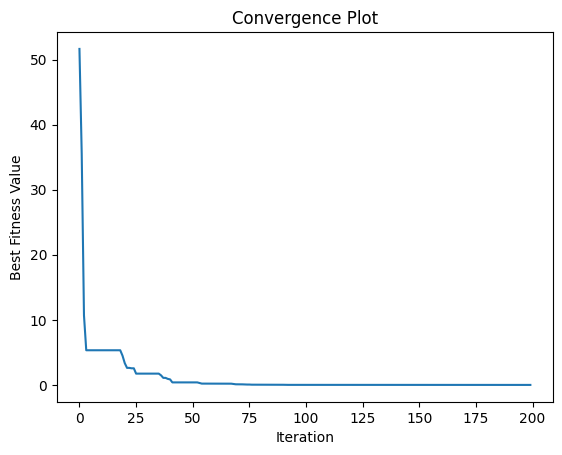

In [14]:
import numpy as np
import pyswarms as ps
import matplotlib.pyplot as plt


def shifted_sphere_func(x):
    return np.sum((x - 1) ** 2, axis=1)

def optimize_with_pso():

    D = 10
    lb = -5 * np.ones(D)
    ub = 5 * np.ones(D)
    bounds = (lb, ub)


    options = {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
    optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=D, options=options, bounds=bounds)
    best_fitness = []

    for i in range(200):
        cost, pos = optimizer.optimize(shifted_sphere_func, iters=1, verbose=False)
        best_fitness.append(cost)
        print(f'Iteration {i+1}/{200}, Best Cost: {cost}')


    best_cost = best_fitness[-1]
    best_pos = pos
    print(f'Optimal solution found by PSO: {best_cost}')
    print(f'Optimal solution point: {best_pos}')

    plt.plot(best_fitness)
    plt.xlabel('Iteration')
    plt.ylabel('Best Fitness Value')
    plt.title('Convergence Plot')
    plt.show()

if __name__ == "__main__":
    optimize_with_pso()


**Optimize with GA**

In [1]:
pip install numpy matplotlib scipy


differential_evolution step 1: f(x)= 8.885710552427856
differential_evolution step 2: f(x)= 8.885710552427856
differential_evolution step 3: f(x)= 8.885710552427856
differential_evolution step 4: f(x)= 6.88243686857098
differential_evolution step 5: f(x)= 4.489466304063957
differential_evolution step 6: f(x)= 2.3074831354059353
differential_evolution step 7: f(x)= 1.8647258194726182
differential_evolution step 8: f(x)= 1.8647258194726182
differential_evolution step 9: f(x)= 1.3043981304631749
differential_evolution step 10: f(x)= 0.9327486319303986
differential_evolution step 11: f(x)= 0.7245661753475787
differential_evolution step 12: f(x)= 0.7245661753475787
differential_evolution step 13: f(x)= 0.7245661753475787
differential_evolution step 14: f(x)= 0.4473124950087518
differential_evolution step 15: f(x)= 0.4473124950087518
differential_evolution step 16: f(x)= 0.40483204478053725
differential_evolution step 17: f(x)= 0.40483204478053725
differential_evolution step 18: f(x)= 0.4048

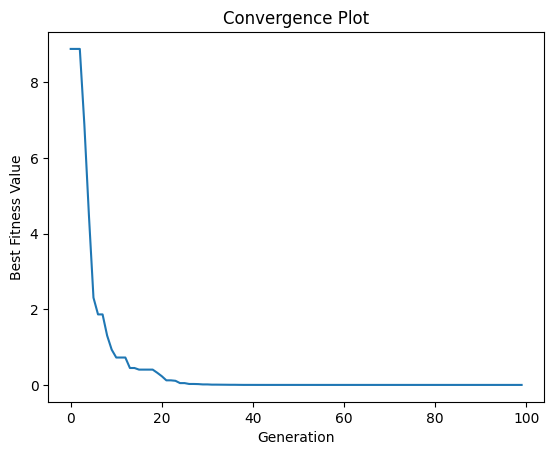

In [15]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt


def shifted_sphere_func(x):
    return np.sum((x - 1) ** 2)

def optimize_with_ga():

    D = 10
    bounds = [(-5, 5)] * D
    options = {
        'strategy': 'best1bin',
        'maxiter': 100,
        'popsize': 50,
        'disp': True
    }

    best_fitness = []

    def callback(xk, convergence):
        best_fitness.append(shifted_sphere_func(xk))
    result = differential_evolution(
        shifted_sphere_func,
        bounds,
        callback=callback,
        strategy=options['strategy'],
        maxiter=options['maxiter'],
        popsize=options['popsize'],
        disp=options['disp']
    )


    print(f'Optimal solution found by GA: {result.fun}')
    print(f'Optimal solution point: {result.x}')

    plt.plot(best_fitness)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness Value')
    plt.title('Convergence Plot')
    plt.show()

if __name__ == "__main__":
    optimize_with_ga()


**Optimize with DE**

differential_evolution step 1: f(x)= 11.645211339984465
differential_evolution step 2: f(x)= 8.029224020377992
differential_evolution step 3: f(x)= 8.029224020377992
differential_evolution step 4: f(x)= 7.051464456154023
differential_evolution step 5: f(x)= 7.051464456154023
differential_evolution step 6: f(x)= 4.216085631950342
differential_evolution step 7: f(x)= 1.9282025669014569
differential_evolution step 8: f(x)= 1.9282025669014569
differential_evolution step 9: f(x)= 1.9282025669014569
differential_evolution step 10: f(x)= 1.9282025669014569
differential_evolution step 11: f(x)= 1.9282025669014569
differential_evolution step 12: f(x)= 1.9282025669014569
differential_evolution step 13: f(x)= 1.9282025669014569
differential_evolution step 14: f(x)= 1.9282025669014569
differential_evolution step 15: f(x)= 1.9282025669014569
differential_evolution step 16: f(x)= 0.8884727653381277
differential_evolution step 17: f(x)= 0.8884727653381277
differential_evolution step 18: f(x)= 0.88847

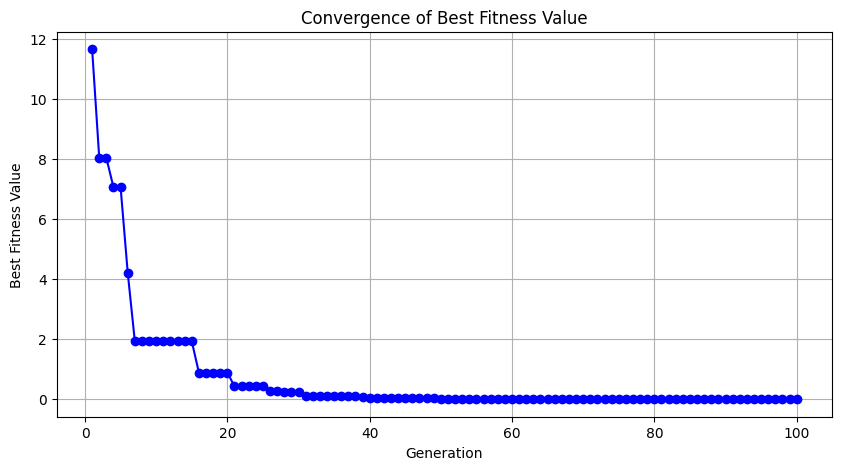

In [16]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

def shifted_sphere_func(x):
    """Calculate the value of the shifted sphere function."""
    return np.sum((x - 1) ** 2)

def optimize_with_de():

    D = 10
    bounds = [(-5, 5)] * D
    strategy = 'best1bin'
    maxiter = 100
    popsize = 50
    mutation = 0.8
    recombination = 0.9
    generations = []
    best_fitness_values = []

    def callback(xk, convergence):
        current_fitness = shifted_sphere_func(xk)
        generations.append(len(generations) + 1)
        best_fitness_values.append(current_fitness)


    result = differential_evolution(
        shifted_sphere_func,
        bounds,
        strategy=strategy,
        maxiter=maxiter,
        popsize=popsize,
        mutation=mutation,
        recombination=recombination,
        callback=callback,
        disp=True
    )

    print('Optimal solution found by DE:', result.fun)
    print('Optimal solution point:', result.x)

    plt.figure(figsize=(10, 5))
    plt.plot(generations, best_fitness_values, marker='o', linestyle='-', color='b')
    plt.title('Convergence of Best Fitness Value')
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness Value')
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    optimize_with_de()


**Performance Comparision**

In [7]:
pip install numpy scipy matplotlib deap pyswarms


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.3 MB/s eta 0:00:00


2024-08-01 14:16:47,192 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=646
2024-08-01 14:16:47,389 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 646.3496320368615, best pos: [ 3.10340676 -4.07961856]
2024-08-01 14:16:47,402 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=34.8
2024-08-01 14:16:47,597 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 34.79445655452374, best pos: [-0.01105547 -0.8570191 ]
2024-08-01 14:16:47,606 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.5, 'w': 0.9}
pyswarms.single.global_best: 100%|██████████|100/100, best_cost=385
2024-08-01 14:16:47,858 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 385.4184081821922, 

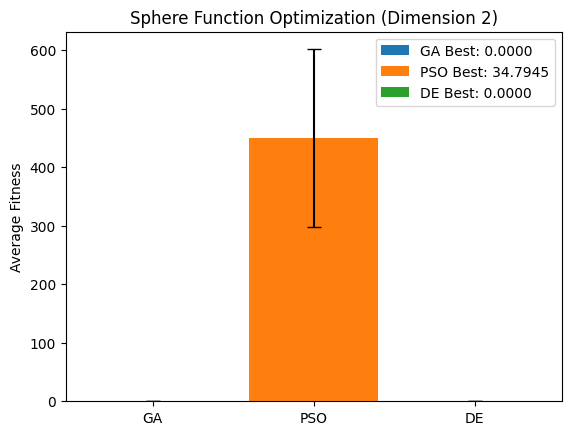

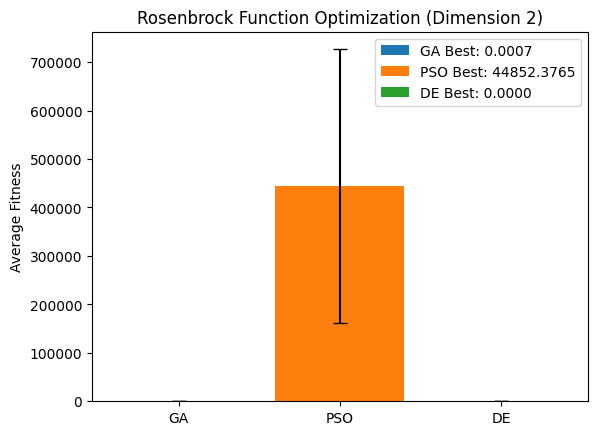

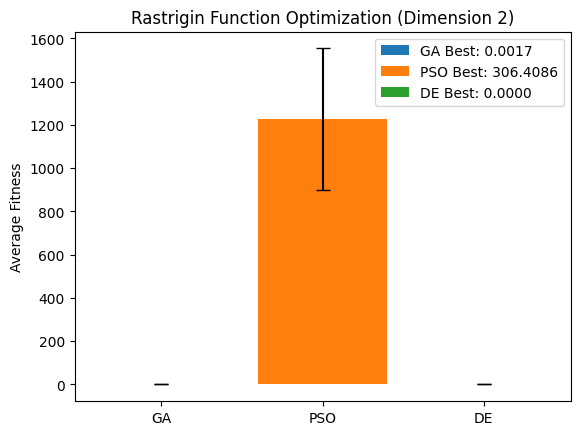

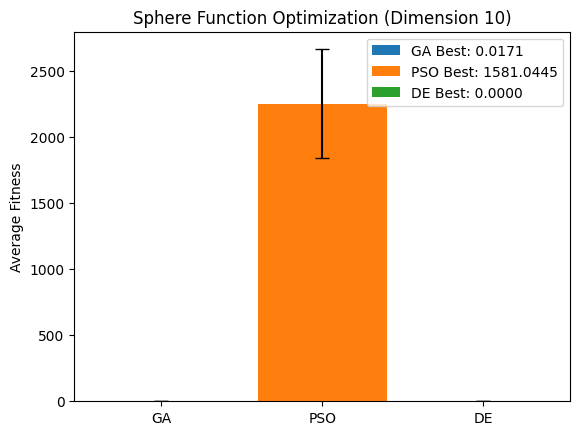

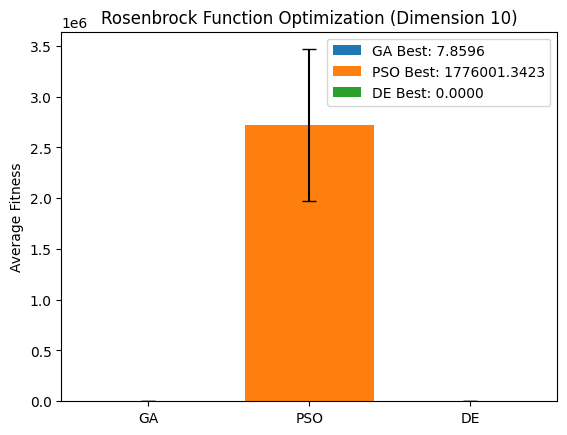

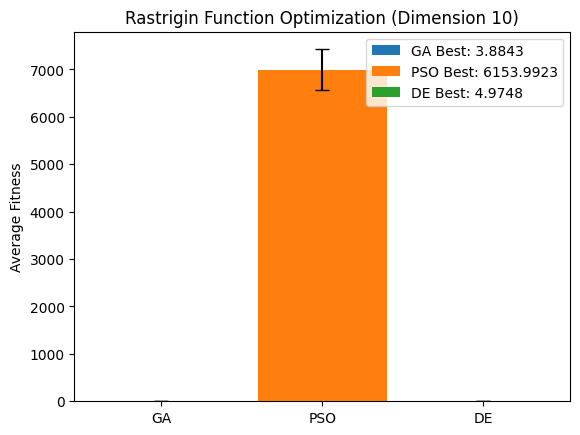

In [17]:
import numpy as np
from scipy.optimize import differential_evolution
from deap import creator, base, tools, algorithms
import pyswarms as ps
import matplotlib.pyplot as plt

if not hasattr(creator, "FitnessMin"):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
if not hasattr(creator, "Individual"):
    creator.create("Individual", np.ndarray, fitness=creator.FitnessMin)


def sphere(x):
    return (np.sum(x**2),)

def rosenbrock(x):
    return (np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2),)

def rastrigin(x):
    return (np.sum(x**2 - 10 * np.cos(2 * np.pi * x) + 10),)

functions = {
    "Sphere": sphere,
    "Rosenbrock": rosenbrock,
    "Rastrigin": rastrigin
}

def numpy_array_equal(ind1, ind2):
    return np.array_equal(ind1, ind2)

def run_ga(func, bounds, dimensions):
    toolbox = base.Toolbox()
    toolbox.register("attr_float", np.random.uniform, bounds[0], bounds[1])
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dimensions)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    toolbox.register("evaluate", func)
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)

    pop = toolbox.population(n=50)
    hof = tools.HallOfFame(1, similar=numpy_array_equal)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", np.mean)
    stats.register("min", np.min)
    stats.register("max", np.max)

    algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=False)
    return hof.items[0].fitness.values[0]

def run_pso(func, bounds, dimensions):
    optimizer = ps.single.GlobalBestPSO(n_particles=50, dimensions=dimensions, options={'c1': 0.5, 'c2': 0.5, 'w': 0.9}, bounds=(np.full(dimensions, bounds[0]), np.full(dimensions, bounds[1])))
    cost, pos = optimizer.optimize(func, iters=100)
    return cost

def run_de(func, bounds, dimensions):
    result = differential_evolution(func, [(bounds[0], bounds[1])] * dimensions, maxiter=100, popsize=50)
    return result.fun

optim_algorithms = {
    "GA": run_ga,
    "PSO": run_pso,
    "DE": run_de
}

dimensions = [2, 10]
num_runs = 15
results = {}
for dim in dimensions:
    results[dim] = {}
    for name, func in functions.items():
        results[dim][name] = {}
        for alg_name, alg_func in optim_algorithms.items():
            performances = []
            for _ in range(num_runs):
                performance = alg_func(func, (-5, 5), dim)
                performances.append(performance)
            results[dim][name][alg_name] = {
                'best': min(performances),
                'worst': max(performances),
                'average': np.mean(performances),
                'stdDev': np.std(performances)
            }

for dim in dimensions:
    for name in functions:
        plt.figure()
        labels = []
        for alg_name in optim_algorithms:
            data = results[dim][name][alg_name]
            labels.append(f"{alg_name} Best: {data['best']:.4f}")
            plt.bar(alg_name, data['average'], yerr=data['stdDev'], capsize=5)
        plt.title(f'{name} Function Optimization (Dimension {dim})')
        plt.ylabel('Average Fitness')
        plt.legend(labels)
        plt.show()
